In [4]:
from deepnet.models import load_model
from data import load_metadata,load_image
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import time
import pickle

%matplotlib inline

In [5]:
model = load_model('data/pretrained/_vgg16_.15-0.97.hdf5', compile=False)
label_encoder = pickle.load(open('data/models/labelencoder.sav','rb'))
metadata = load_metadata('data/images')

def recognize(img):
    start_time = time.time()
    x = (img/225.)
    prediction = model.predict(np.expand_dims(x, axis=0))[0]
    respond_time = time.time() - start_time
    label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    
    return label,prediction[np.argmax(prediction)], respond_time

/home/risusanto/anaconda3/envs/dl_test/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Image path: data/images/farhan/10.jpg


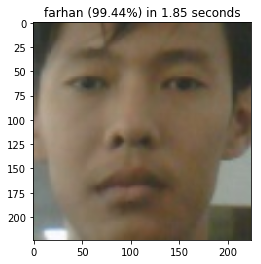

In [9]:
test_idx = 77
image = cv2.imread(metadata[test_idx].image_path())
image = cv2.resize(image,(224,224))
label, confidence, respond_time = recognize(image)
confidence = "%.2f" % (confidence * 100)
respond_time = "%.2f" % respond_time
img_plot = image[...,::-1]

plt.imshow(img_plot)
plt.title(f'{label} ({confidence}%) in {respond_time} seconds')
print(f'Image path: {metadata[test_idx].image_path()}')